In [1]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # for data visualization purposes
from sklearn.feature_extraction.text import TfidfVectorizer
#Imports para asignar un número entero único a cada categoría. 
# Es útil cuando las categorías tienen un orden implícito
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split

# train a Random Forest on the training set
from sklearn.ensemble import RandomForestClassifier

# import para guardar el modelo entrenado en un archivo
import joblib

In [ ]:
#Se carga el fichero con los datos tipificados que se utilizarán también como datos de entrenamiento
data = './input/datos_ingresos.csv'
df = pd.read_csv(data)


# Función para limpiar texto
def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.lower()  
        texto = re.sub(r'\W', ' ', texto)  
        texto = re.sub(r'\s+', ' ', texto)  
        return texto.strip()
    return ''

# Cargar datos y limpiar texto
df['concepto'] = df['concepto'].fillna('').apply(limpiar_texto)

# Codificar la variable objetivo
le_y = LabelEncoder()
y = le_y.fit_transform(df['class'])  
class_names = le_y.classes_  # Guardar nombres de clases
# Aplicar TF-IDF con stopwords en español y un límite de características
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['concepto'])  

# Verificar dimensión de los datos
#print("Dimensión de X_tfidf:", X_tfidf.shape)

# División en datos de entrenamiento y prueba
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# Definir el modelo
model = RandomForestClassifier(n_estimators=70, random_state=30, class_weight='balanced')

# Entrenar el modelo
model.fit(X_train_tfidf, y_train)




RandomForestClassifier(class_weight='balanced', n_estimators=70,
                       random_state=30)

In [28]:
# Guardar modelo entrenado
joblib.dump(model, "./modelo_entrenado/random_forest.pkl")

# Guardar el vectorizador TF-IDF
joblib.dump(tfidf_vectorizer, "./modelo_entrenado/tfidf_random_forest.pkl")

# Guardar LabelEncoder para la codificación de 'class' y poder precedir las frases y dar su categoria
joblib.dump(le_y, "./modelo_entrenado/random_forest_encoder_class.pkl")

['./modelo_entrenado/random_forest_encoder_class.pkl']

Accuracy: 0.9883720930232558
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        41
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3

    accuracy                           0.99        86
   macro avg       0.99      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



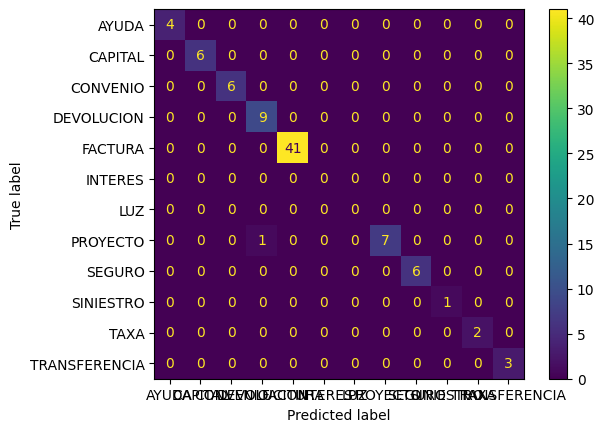

In [24]:
# 5. Predecimos con el modelo
y_pred = model.predict(X_test_tfidf)


# 6. Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Obtener los nombres correctos de las clases
etiquetas = le_y.classes_ 

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred,labels=le_y.transform(class_names))

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=class_names, labels=le_y.transform(class_names), zero_division=0)


